In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


#Как будем сравнивать различные методы?

In [65]:
import pandas as pd
import numpy as np
import random
import collections

import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
def insert_NA(df, per):
  replaced = collections.defaultdict(set)
  ix = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
  random.shuffle(ix)
  to_replace = int(round(per*len(ix)))
  for row, col in ix:
    if len(replaced[row]) < df.shape[1] - 1:
      df.iloc[row, col] = np.nan
      to_replace -= 1
      replaced[row].add(col)
      if to_replace == 0:
        break
  
  return(df)

In [67]:
def MAE(actual, missing, imputation):
  mask = missing.isna()
  return(abs(actual[mask] - imputation[mask]).sum().sum() / mask.sum().sum())

In [68]:
dataset = pd.read_csv("/content/gdrive/MyDrive/ML/Datasets/Breast Cancer Wisconsin (Diagnostic).csv")

In [69]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [70]:
dataset = dataset.drop(["diagnosis"], axis = 1)

In [71]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [72]:
dataset.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [73]:
data_NA = insert_NA(dataset.copy(), 0.03)
data_NA.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,NaN,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,NaN,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [74]:
data_NA.shape

(569, 30)

In [75]:
data_NA.isna().sum()

radius_mean                20
texture_mean               18
perimeter_mean             15
area_mean                  21
smoothness_mean            22
compactness_mean           20
concavity_mean             14
concave points_mean        10
symmetry_mean              14
fractal_dimension_mean     16
radius_se                  12
texture_se                 23
perimeter_se               13
area_se                    15
smoothness_se              14
compactness_se             19
concavity_se               21
concave points_se          13
symmetry_se                24
fractal_dimension_se       20
radius_worst               19
texture_worst              16
perimeter_worst            20
area_worst                 16
smoothness_worst           16
compactness_worst          17
concavity_worst            18
concave points_worst       14
symmetry_worst             13
fractal_dimension_worst    19
dtype: int64

In [76]:
data_NA.isnull().mean().sort_values(ascending = False)

symmetry_se                0.042179
texture_se                 0.040422
smoothness_mean            0.038664
area_mean                  0.036907
concavity_se               0.036907
radius_mean                0.035149
fractal_dimension_se       0.035149
compactness_mean           0.035149
perimeter_worst            0.035149
compactness_se             0.033392
fractal_dimension_worst    0.033392
radius_worst               0.033392
texture_mean               0.031634
concavity_worst            0.031634
compactness_worst          0.029877
smoothness_worst           0.028120
fractal_dimension_mean     0.028120
area_worst                 0.028120
texture_worst              0.028120
area_se                    0.026362
perimeter_mean             0.026362
symmetry_mean              0.024605
concavity_mean             0.024605
concave points_worst       0.024605
smoothness_se              0.024605
perimeter_se               0.022847
concave points_se          0.022847
symmetry_worst             0

In [77]:
from sklearn.impute import SimpleImputer

In [78]:
sumple_imp = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)

In [79]:
data_NA_zero = sumple_imp.fit_transform(data_NA)
data_NA_zero = pd.DataFrame(data_NA_zero, columns = data_NA.columns)

In [80]:
data_NA_zero.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,0.00,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.000000,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.000000,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [81]:
data_NA_zero.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [82]:
zero_mae = MAE(dataset, data_NA, data_NA_zero)
zero_mae

64.22786784765628

#Удаление неполных векторов

In [22]:
data_NA.isna().sum()

radius_mean                164
texture_mean               174
perimeter_mean             172
area_mean                  159
smoothness_mean            164
compactness_mean           182
concavity_mean             154
concave points_mean        187
symmetry_mean              187
fractal_dimension_mean     162
radius_se                  174
texture_se                 165
perimeter_se               175
area_se                    170
smoothness_se              164
compactness_se             182
concavity_se               172
concave points_se          165
symmetry_se                162
fractal_dimension_se       158
radius_worst               167
texture_worst              167
perimeter_worst            201
area_worst                 172
smoothness_worst           184
compactness_worst          173
concavity_worst            168
concave points_worst       148
symmetry_worst             171
fractal_dimension_worst    178
dtype: int64

In [23]:
data_NA.shape

(569, 30)

In [24]:
data_NA.dropna().shape

(0, 30)

In [25]:
data_NA.dropna(axis = 1).shape

(569, 0)

In [26]:
# отбросить строки, только если все столбцы содержат NaN
data_NA.dropna(how = 'all').shape

(569, 30)

In [ ]:
# отбросить строки, если в них менее 4 значений не NaN
data_NA.dropna(thresh = 4).shape

(569, 30)

In [ ]:
# отбросить столбцы, если в них менее 10 значений не NaN
data_NA.dropna(thresh = 10, axis = 1).shape

(569, 30)

#SimpleImputer:

In [83]:
from sklearn.impute import SimpleImputer

##Среднее арифметическое

In [84]:
sumple_imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [85]:
data_NA_mean = sumple_imp.fit_transform(data_NA)
data_NA_mean = pd.DataFrame(data_NA_mean, columns = data_NA.columns)

In [86]:
data_NA_mean.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,19.248149,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.770000,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.250000,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.003808,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.380000,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.003808,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.340000,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [87]:
data_NA_mean.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [88]:
mean_mae = MAE(dataset, data_NA, data_NA_mean)
mean_mae

24.63672132911663

##Медиана

In [89]:
%%time
sumple_imp = SimpleImputer(missing_values = np.nan, strategy = 'median')

data_NA_median = sumple_imp.fit_transform(data_NA)
data_NA_median = pd.DataFrame(data_NA_median, columns = data_NA.columns)

CPU times: user 5.75 ms, sys: 1 ms, total: 6.75 ms
Wall time: 7.8 ms


In [90]:
data_NA_median.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [91]:
data_NA_mean.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,19.248149,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.770000,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.250000,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.003808,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.380000,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.003808,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.340000,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [92]:
median_mae = MAE(dataset, data_NA, data_NA_median)
median_mae

22.595794021484377

##Мода

In [93]:
sumple_imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

data_NA_moda = sumple_imp.fit_transform(data_NA)
data_NA_moda = pd.DataFrame(data_NA_moda, columns = data_NA.columns)

In [94]:
moda_mae = MAE(dataset, data_NA, data_NA_moda)
moda_mae

34.77742653124999

#Multivariate feature imputation

In [48]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Iterative Imputer (RandomForestRegressor)

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
imp_iter = IterativeImputer(missing_values = np.nan, estimator = RandomForestRegressor())

In [97]:
%%time
data_NA_rf = imp_iter.fit_transform(data_NA)
data_NA_rf = pd.DataFrame(data_NA_rf, columns = data_NA.columns)

CPU times: user 1min 37s, sys: 331 ms, total: 1min 37s
Wall time: 1min 37s


In [98]:
data_NA_rf.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [99]:
data_NA_rf.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,14.0577,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.7700,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.2500,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004024,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.3800,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.011351,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.3400,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [100]:
rf_mae = MAE(dataset, data_NA, data_NA_rf)
rf_mae

1.4574557139145143

##MissForest

In [101]:
!pip install missingpy
from missingpy import MissForest

In [102]:
imputer = MissForest()

In [103]:
%%time
data_NA_miss_forest = imputer.fit_transform(data_NA)
data_NA_miss_forest = pd.DataFrame(data_NA_miss_forest, columns = data_NA.columns)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
CPU times: user 3min 38s, sys: 3.72 s, total: 3min 42s
Wall time: 2min 23s


In [104]:
miss_forest_mae = MAE(dataset, data_NA, data_NA_miss_forest)
miss_forest_mae

1.3614931018943357

##KNNImputer

In [106]:
from sklearn.impute import KNNImputer

In [107]:
imputer = KNNImputer(n_neighbors = 5, weights = "uniform")

In [108]:
data_NA_KNNImputer = imputer.fit_transform(data_NA)
data_NA_KNNImputer = pd.DataFrame(data_NA_KNNImputer, columns = data_NA.columns)

In [109]:
knn_mae = MAE(dataset, data_NA, data_NA_KNNImputer)
knn_mae

4.224608857031248

#Сравниваем методы

In [110]:
list_mae = [zero_mae, mean_mae, median_mae, moda_mae, rf_mae, miss_forest_mae, knn_mae]

methods = ['Zero', 'Mean', 'Median', 'Moda', 'Random Forest', 'Miss Forest', 'KNN']

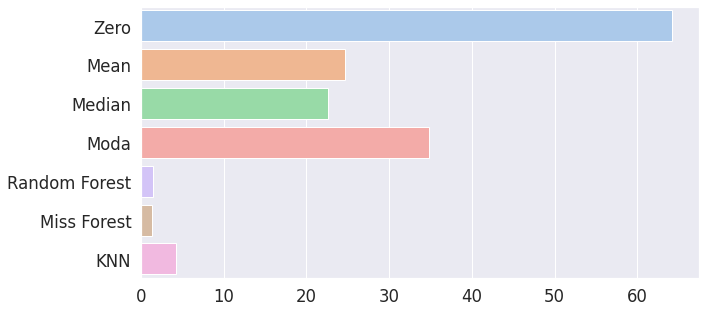

In [111]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y = methods, x = list_mae, palette = 'pastel', orient = 'h');

#Восстановление пропущенных значений в данных смешанного типа

In [ ]:
!pip install missingpy
from missingpy import MissForest
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
import copy

In [113]:
path = "/content/gdrive/MyDrive/ML/Datasets/adult.csv"            # Иногда могут быть проблемы с кирилицей в названиях папок на пути к файлу, постарайтесь всегда использовтаь только латиницу.
data = pd.read_csv(path, sep = ",")                               # Путь к файлу можно записать как отдельно, так и внутри метода read_csv.

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Never-worked,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Never-worked,186061,Some-college,10,Widowed,Handlers-cleaners,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [114]:
X = data.drop(["income"], axis = 1)

In [115]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Never-worked,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Never-worked,186061,Some-college,10,Widowed,Handlers-cleaners,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [116]:
X.shape

(32561, 14)

In [117]:
X.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

In [118]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [119]:
X_NA = insert_NA(X.copy(), 0.3)
X_NA.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90.0,Never-worked,NaN,HS-grad,9.0,Widowed,NaN,Not-in-family,White,NaN,0.0,4356.0,40.0,United-States
1,82.0,NaN,NaN,NaN,9.0,Widowed,Exec-managerial,Not-in-family,NaN,Female,NaN,4356.0,18.0,United-States
2,66.0,Never-worked,NaN,NaN,10.0,Widowed,Handlers-cleaners,Unmarried,Black,NaN,0.0,4356.0,40.0,NaN
3,NaN,Private,140359.0,7th-8th,NaN,NaN,Machine-op-inspct,Unmarried,White,Female,NaN,NaN,NaN,United-States
4,41.0,Private,264663.0,Some-college,NaN,NaN,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States


In [143]:
imp_iter2 = IterativeImputer(missing_values = np.nan, estimator = RandomForestClassifier())

In [ ]:
%%time
data_NA_rf = imp_iter2.fit_transform(res_X)

In [120]:
X_NA.isna().sum()

age               9830
workclass         9758
fnlwgt            9701
education         9719
education.num     9692
marital.status    9798
occupation        9841
relationship      9759
race              9671
sex               9799
capital.gain      9720
capital.loss      9818
hours.per.week    9828
native.country    9822
dtype: int64

In [ ]:
def imputation_missing_value(data):
  categorical_feature_list = list(data.select_dtypes(include = 'object').columns)
  int_label = list(data.select_dtypes(include = 'object').columns) + list(data.select_dtypes(include = 'int64').columns)
  encoding_dict = defaultdict(LabelEncoder)

  original = copy.deepcopy(data)
  mask = original.isnull()

  for i in categorical_feature_list:
    data[i][pd.isnull(data[i])] = 'XXX'

  for col in categorical_feature_list:
    le = LabelEncoder()
    le.fit(list(data[col]))
    encoding_dict[col] = le

  for col in categorical_feature_list:
    data[col] = encoding_dict[col].transform(data[col])

  data = data.where(~mask, original)

  imputer = MissForest()
  cat_vars = [data.columns.get_loc(c) for c in categorical_feature_list if c in data]
  data_imputed = imputer.fit_transform(data, cat_vars)
  data_imputed = pd.DataFrame(data_imputed, columns = data.columns)

  for i in int_label:
    data_imputed[i] = data_imputed[i].astype(int)

  for col in categorical_feature_list:
    data_imputed[col] = encoding_dict[col].inverse_transform(data_imputed[col])

  return(data_imputed)

In [ ]:
%%time
X_miss_forest = imputation_missing_value(X_NA)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [ ]:
X_miss_forest

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90.00,Never-worked,254514.55,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,108.6,4356.00,40.00,United-States
1,50.58,Private,153255.63,HS-grad,9.0,Married-AF-spouse,Other-service,Not-in-family,White,Female,0.0,18.76,18.00,Trinadad&Tobago
2,44.65,Never-worked,186061.00,Some-college,10.0,Widowed,Handlers-cleaners,Unmarried,Black,Female,0.0,4356.00,40.00,United-States
3,54.00,Private,156779.50,7th-8th,4.0,Divorced,Machine-op-inspct,Not-in-family,White,Female,0.0,50.80,40.00,United-States
4,41.00,Private,264663.00,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.00,40.00,Rare native.country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,29.96,Private,310152.00,Some-college,10.0,Never-married,Farming-fishing,Other-relative,Other,Male,0.0,0.00,40.33,United-States
32557,34.52,Private,257302.00,Assoc-acdm,12.0,Married-civ-spouse,Craft-repair,Wife,White,Female,0.0,0.00,38.00,South
32558,40.00,Private,154374.00,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,0.0,0.00,40.45,United-States
32559,58.00,Private,151910.00,Masters,14.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.00,35.94,Trinadad&Tobago


In [ ]:
X_miss_forest.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64